In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import shutil
shutil.rmtree('/content/drive/MyDrive/FIRE-SMOKE-DATASET/Test/Smoke')
shutil.rmtree('/content/drive/MyDrive/FIRE-SMOKE-DATASET/Train/Smoke')

In [ ]:
!pip install keras_preprocessing
! apt-get install graphviz


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.6 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [ ]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import shutil
TRAINING_DIR = "/content/drive/MyDrive/FIRE-SMOKE-DATASET/Train"

training_datagen = ImageDataGenerator(rescale=1./255,
																			zoom_range=0.15,
																			horizontal_flip=True,
                                      fill_mode='nearest')

VALIDATION_DIR = "/content/drive/MyDrive/FIRE-SMOKE-DATASET/Test"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(224,224),
	shuffle = True,
	class_mode='categorical',
  batch_size = 128
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(224,224),
	class_mode='categorical',
	shuffle = True,
  batch_size= 14
)

Found 1800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.utils import plot_model
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import shutil
import os
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics import classification_report, confusion_matrix

# Define the input tensor
input_tensor = Input(shape=(224, 224, 3))

# Load the InceptionV3 model without the top layer
base_model = InceptionV3(input_tensor=input_tensor, weights='imagenet', include_top=False)

# Add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(2048, activation='relu')(x)
x = Dropout(0.25)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(2, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

# Print the model summary
model.summary()

# Plot the model with customized styling
plot_model(model, to_file='model_structure.png', show_shapes=True, show_layer_names=True,
           rankdir='TB', expand_nested=True, dpi=200)

# Display the model plot inline (if using Jupyter or Colab)
from IPython.display import Image
Image(filename='model_structure.png')


87910968/87910968 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_loss')<=0.1099 and logs.get('loss')<=0.1099):
      print('\n\n Reached The Destination!')
      self.model.stop_training = True
callbacks = myCallback()

history = model.fit(
    train_generator,
    steps_per_epoch = 14,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 14,
    callbacks=[callbacks]
)

Epoch 1/20
14/14 [==============================] - 340s 23s/step - loss: 9.7306 - acc: 0.7984 - val_loss: 0.1205 - val_acc: 0.9439
Epoch 2/20
14/14 [==============================] - 293s 21s/step - loss: 0.3740 - acc: 0.8888 - val_loss: 0.1088 - val_acc: 0.9592
Epoch 3/20
14/14 [==============================] - 288s 20s/step - loss: 0.0674 - acc: 0.9743 - val_loss: 0.2494 - val_acc: 0.9133
Epoch 4/20
14/14 [==============================] - ETA: 0s - loss: 0.0577 - acc: 0.9777 

 Reached The Destination!
14/14 [==============================] - 310s 22s/step - loss: 0.0577 - acc: 0.9777 - val_loss: 0.1069 - val_acc: 0.9643


In [ ]:

for layer in model.layers[:249]:
   layer.trainable = False
for layer in model.layers[249:]:
   layer.trainable = True

from tensorflow.keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['acc'])


class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_loss')<=0.1099 and logs.get('loss')<=0.1099):
      print('\n\n Reached The Destination!')
      self.model.stop_training = True
callbacks = myCallback()

history = model.fit(
    train_generator,
    steps_per_epoch = 14,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps = 14,
    callbacks=[callbacks]
)
print(len(base_model.layers))

Epoch 1/10
14/14 [==============================] - 342s 26s/step - loss: 0.1455 - acc: 0.9414 - val_loss: 0.7613 - val_acc: 0.8367
Epoch 2/10
14/14 [==============================] - 332s 23s/step - loss: 0.0283 - acc: 0.9880 - val_loss: 0.7125 - val_acc: 0.8929
Epoch 3/10
14/14 [==============================] - 354s 25s/step - loss: 0.0145 - acc: 0.9970 - val_loss: 0.6279 - val_acc: 0.9082
Epoch 4/10
14/14 [==============================] - 347s 24s/step - loss: 0.0050 - acc: 0.9988 - val_loss: 0.4496 - val_acc: 0.9082
Epoch 5/10
14/14 [==============================] - 349s 25s/step - loss: 0.0041 - acc: 0.9994 - val_loss: 0.2863 - val_acc: 0.9388
Epoch 6/10
14/14 [==============================] - 345s 24s/step - loss: 9.9240e-04 - acc: 1.0000 - val_loss: 0.2093 - val_acc: 0.9592
Epoch 7/10
14/14 [==============================] - 325s 23s/step - loss: 0.0033 - acc: 0.9988 - val_loss: 0.1828 - val_acc: 0.9592
Epoch 8/10
14/14 [==============================] - 349s 25s/step - loss

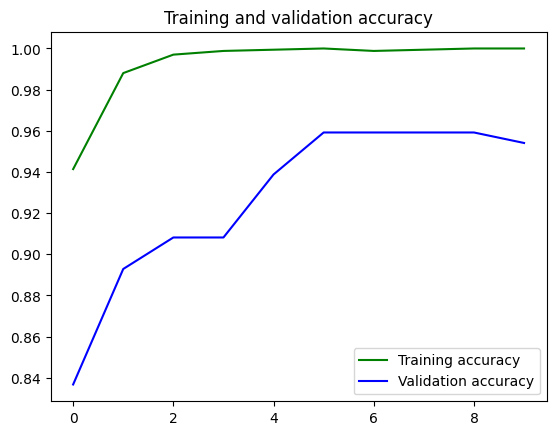

<Figure size 640x480 with 0 Axes>

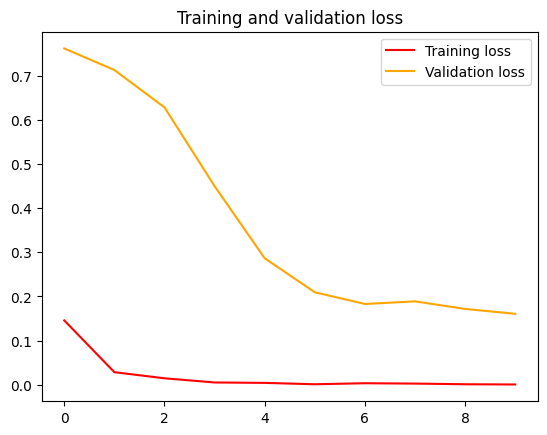

<Figure size 640x480 with 0 Axes>

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'orange', label='Validation loss')
plt.title('Training and validation loss')

plt.legend(loc=0)
plt.figure()
plt.show()

In [ ]:
#predicting any random image
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
for fn in uploaded.keys():
  path = '/content/' + fn
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0) /255
  classes = model.predict(x)
  print(np.argmax(classes[0])==0, max(classes[0]))

Saving download.jpg to download (1).jpg
1/1 [==============================] - 3s 3s/step
True 1.0
